# Analysing Case Data

In [1]:
%pip install lxml -q
%pip install numpy -q
%pip install folium -q
%pip install geopy -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import csv
import requests
import json
import re
import urllib.request
import os
import re
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import clear_output
import matplotlib.pyplot as plt
from threading import Thread
from datetime import datetime, timedelta
import zipfile
import io
import warnings
from nltk.corpus import stopwords
dutch_stopwords = stopwords.words("dutch")
import time
import numpy as np

## Creating some plots and metrics

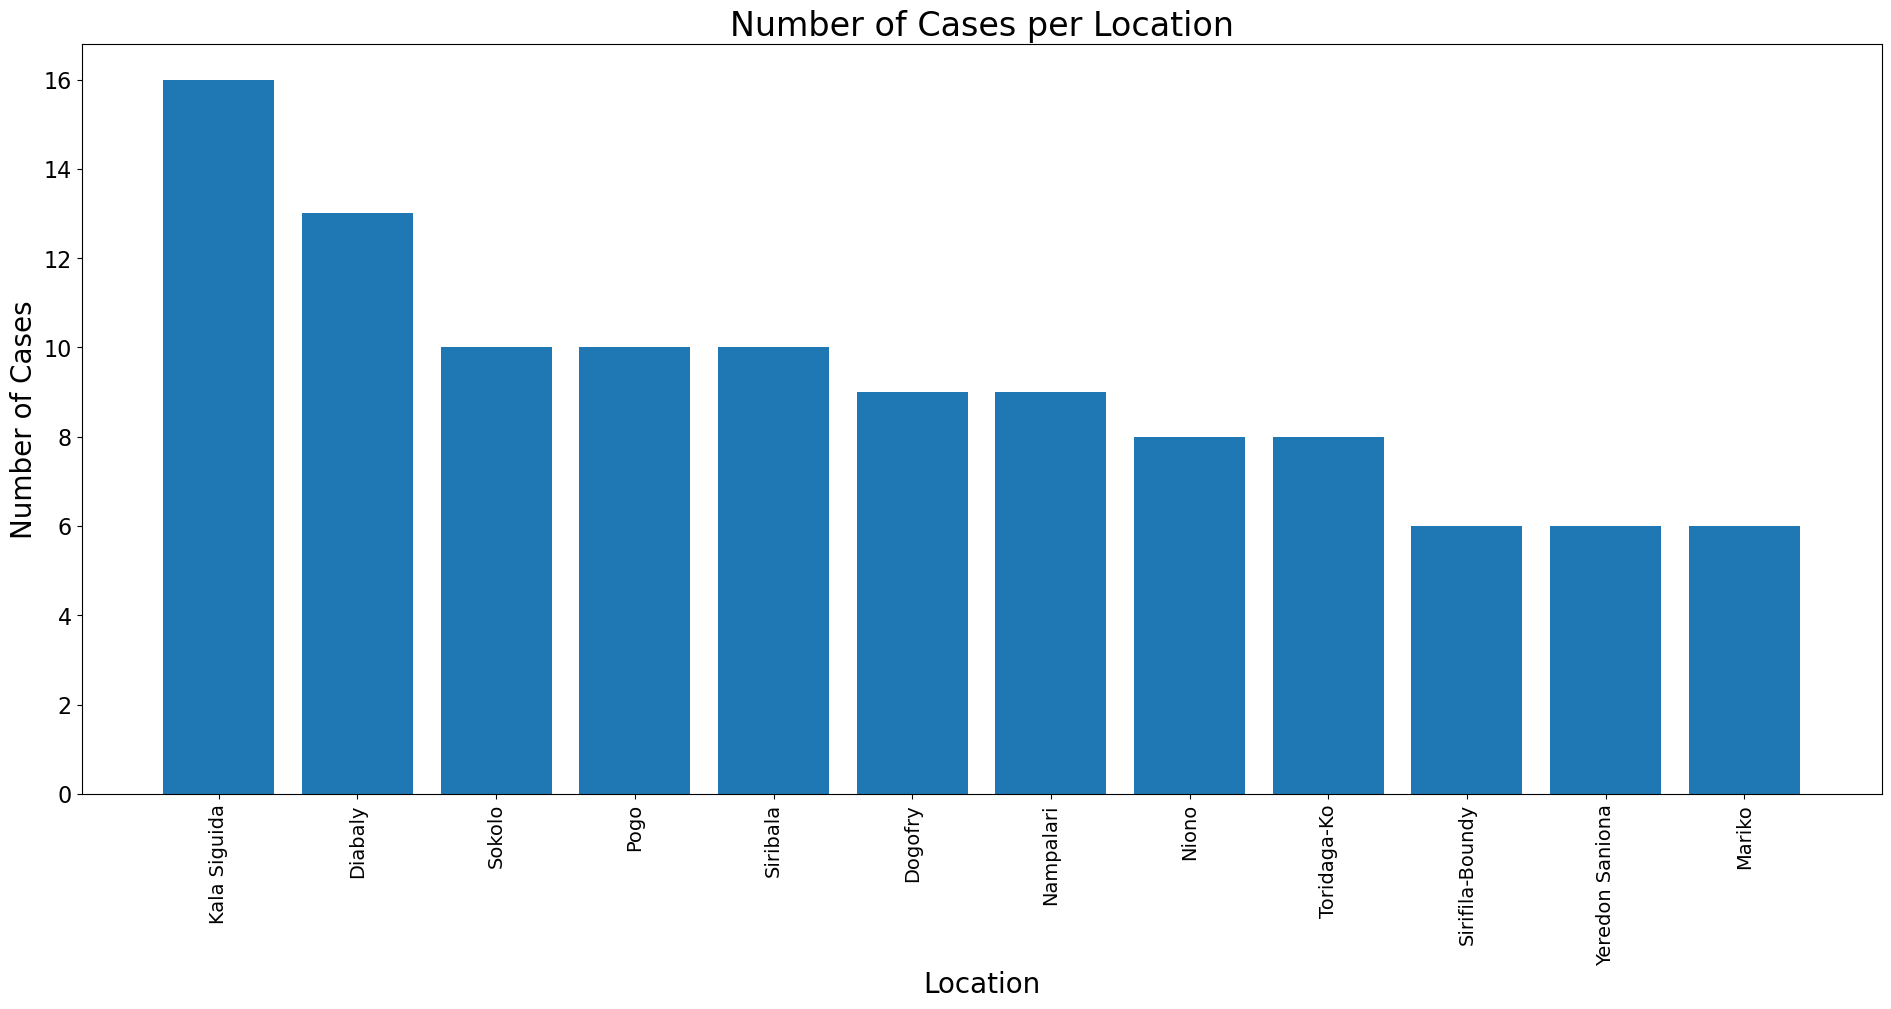

In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Replace this with the URL for your API
url = "http://51.104.163.1:8000/malaria_cases/"

# Send a GET request to the API
response = requests.get(url)

# Load the data into a pandas DataFrame
data = pd.DataFrame(response.json())

# Count the number of cases per location
location_counts = data['location'].value_counts()

# Plot the data as a bar chart
plt.figure(figsize=(20, 10))
plt.bar(location_counts.index, location_counts.values)
plt.xlabel('Location', fontsize=20)
plt.ylabel('Number of Cases', fontsize=20)
plt.title('Number of Cases per Location', fontsize=24)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=16)
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.15, top=0.9)
plt.savefig('cases_per_location.jpg', dpi=300)
plt.show()


In [10]:
import requests
import pandas as pd
import folium

# Replace this with the URL for your API
url = "http://51.104.163.1:8000/malaria_cases/"

# Send a GET request to the API
response = requests.get(url)

# Load the data into a pandas DataFrame
data = pd.DataFrame(response.json())

# Count the number of cases per location
location_counts = data['location'].value_counts()

# collection location infromation. Source (https://en.db-city.com/Mali--S%C3%A9gou--Nampalari)
location_coords = {
    'Diabaly': [14.6936, -6.01694],
    'Dogofry': [15.15, -5.25],
    'Kala Siguida': [13.67, -5.5],
    'Mariko': [14.4383, -5.99972], 
    'Nampalari': [14.1478, -5.86417], 
    'Niono': [14.25, -6], 
    'Pogo': [10.4379, -5.63257],
    'Siribala': [14.0433, -6.10667],
    'Sirifila-Boundy': [14.375, -5.97722], 
    'Sokolo': [14.7328, -6.12194], 
    'Toridaga-Ko': [13.8444, -6.105], 
    'Yeredon Saniona': [13.5892, -5.75389], 
}

location_latitude = {}
location_longitude = {}

for location in location_counts.index:
    if location in location_coords:
        location_latitude[location], location_longitude[location] = location_coords[location]

# Create a map centered on Mali
mali_map = folium.Map(location=[17.570692, -3.996166], zoom_start=6)

# Add markers for each location
for location in location_counts.index:
    if location in location_latitude and location in location_longitude:
        folium.Marker(
            location=[location_latitude[location], location_longitude[location]],
            icon=folium.Icon(color='red',icon='info-sign')
        ).add_child(folium.Popup(f"{location}: {location_counts[location]} cases")).add_to(mali_map)

# Display the map
mali_map
